In [1]:
# Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy.stats import norm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.style.use('seaborn-colorblind')
%matplotlib inline

In [3]:
df = pd.read_csv('cleaned_kings.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,1,1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,2,2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,3,3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,4,4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df = df.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,01/01/1970,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,01/01/1970,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,01/01/1970,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,01/01/1970,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,01/01/1970,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
waterfront = df[df['waterfront'] == 1]
waterfront

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,01/01/1970,1350000.0,3,2.50,2753,65005,1.0,1,2,...,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
229,8096000060,01/01/1970,655000.0,2,1.75,1450,15798,2.0,1,4,...,7,1230,220,1915,1978,98166,47.4497,-122.375,2030,13193
245,2025069065,01/01/1970,2400000.0,4,2.50,3650,8354,1.0,1,4,...,9,1830,1820,2000,0,98074,47.6338,-122.072,3120,18841
263,2123039032,01/01/1970,369900.0,1,0.75,760,10079,1.0,1,4,...,5,760,0,1936,0,98070,47.4683,-122.438,1230,14267
299,3225069065,01/01/1970,3080000.0,4,5.00,4550,18641,1.0,1,4,...,10,2600,1950,2002,0,98074,47.6053,-122.077,4550,19508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,2025069140,01/01/1970,1900000.0,3,2.50,2830,4334,3.0,1,4,...,10,2830,0,2006,0,98074,47.6318,-122.071,2830,38211
20136,518500480,01/01/1970,3000000.0,3,3.50,4410,10756,2.0,1,4,...,11,3430,980,2014,0,98056,47.5283,-122.205,3550,5634
20576,8043700105,01/01/1970,2300000.0,4,4.00,4360,8175,2.5,1,4,...,10,3940,420,2007,0,98008,47.5724,-122.104,2670,8525
21009,518500460,01/01/1970,2230000.0,3,3.50,3760,5634,2.0,1,4,...,11,2830,930,2014,0,98056,47.5285,-122.205,3560,5762


In [6]:
waterfront.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 49 to 21384
Data columns (total 21 columns):
id               146 non-null int64
date             146 non-null object
price            146 non-null float64
bedrooms         146 non-null int64
bathrooms        146 non-null float64
sqft_living      146 non-null int64
sqft_lot         146 non-null int64
floors           146 non-null float64
waterfront       146 non-null int64
view             146 non-null int64
condition        146 non-null int64
grade            146 non-null int64
sqft_above       146 non-null int64
sqft_basement    146 non-null int64
yr_built         146 non-null int64
yr_renovated     146 non-null int64
zipcode          146 non-null int64
lat              146 non-null float64
long             146 non-null float64
sqft_living15    146 non-null int64
sqft_lot15       146 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 25.1+ KB


Text(0.5, 1.0, 'Waterfront Homes')

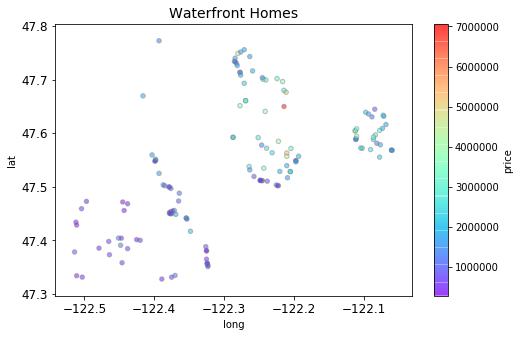

In [9]:
# Color coded plot of homes by price and location
waterfront.plot(kind='scatter', x='long', y='lat', alpha=0.5, figsize=(8,5), 
        c='price', cmap='rainbow', colorbar=True, sharex=False, edgecolors='gray', fontsize=12);
plt.title('Waterfront Homes', fontsize=14)
plt.show()

In [7]:
waterfront.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.760274,3.541096,8.835616,2508.760274,728.458904,1962.280822,395.013699,98096.712329,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.635770,0.743957,1.781233,1283.720489,808.010866,27.118576,796.174006,60.599756,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,0.000000,1.000000,5.000000,440.000000,0.000000,1905.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,3.000000,8.000000,1565.000000,0.000000,1941.250000,0.000000,98040.000000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,3.000000,9.000000,2200.000000,535.000000,1959.500000,0.000000,98075.000000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,4.000000,10.000000,3220.000000,1265.000000,1984.750000,0.000000,98155.000000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


In [8]:
waterfront.median()

id               3.692780e+09
price            1.510000e+06
bedrooms         3.000000e+00
bathrooms        2.500000e+00
sqft_living      2.900000e+03
sqft_lot         1.773050e+04
floors           2.000000e+00
waterfront       1.000000e+00
view             4.000000e+00
condition        3.000000e+00
grade            9.000000e+00
sqft_above       2.200000e+03
sqft_basement    5.350000e+02
yr_built         1.959500e+03
yr_renovated     0.000000e+00
zipcode          9.807500e+04
lat              4.754815e+01
long            -1.222735e+02
sqft_living15    2.695000e+03
sqft_lot15       1.626050e+04
dtype: float64

# Waterfront Homes

* Number: 146
* Average Price: $1,510,000 (median)  $1,717,215 (mean)
* Average Size: 2900 sq ft
* Average Size Lot: 17,730 sq ft
* Average Grade: 9
* Average Condition: 3
* Have Basement: 90
* Bedrooms: 1 to 6  

[Text(0.5, 0, 'sqft_living')]

[Text(0, 0.5, 'price')]

[Text(0, 0.5, 'price'),
 Text(0.5, 0, 'sqft_living'),
 Text(0.5, 1.0, 'Waterfront Square foot Living by Price\nScaled by Grade')]

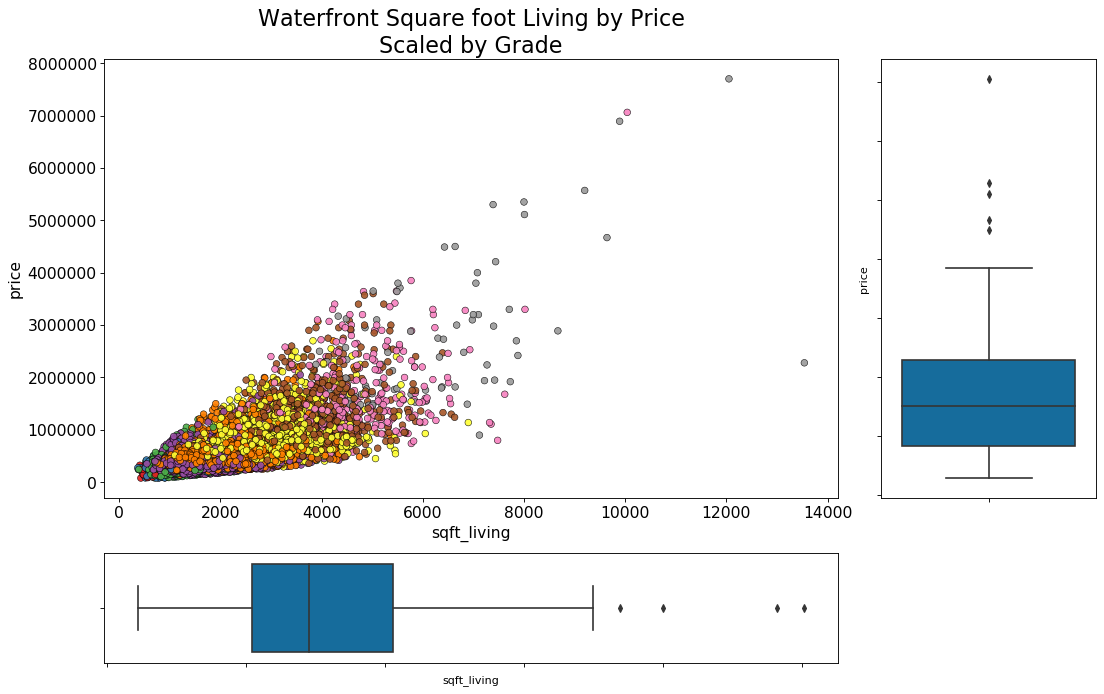

In [9]:

# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('sqft_living', 'price', c=df.grade.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(waterfront.price, ax=ax_right, orient="v")
sns.boxplot(waterfront.sqft_living, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='sqft_living')
ax_right.set(ylabel='price')

# Main Title, Xlabel and YLabel
ax_main.set(title='Waterfront Square foot Living by Price\nScaled by Grade', xlabel='sqft_living', ylabel='price')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

<Figure size 1656x936 with 0 Axes>

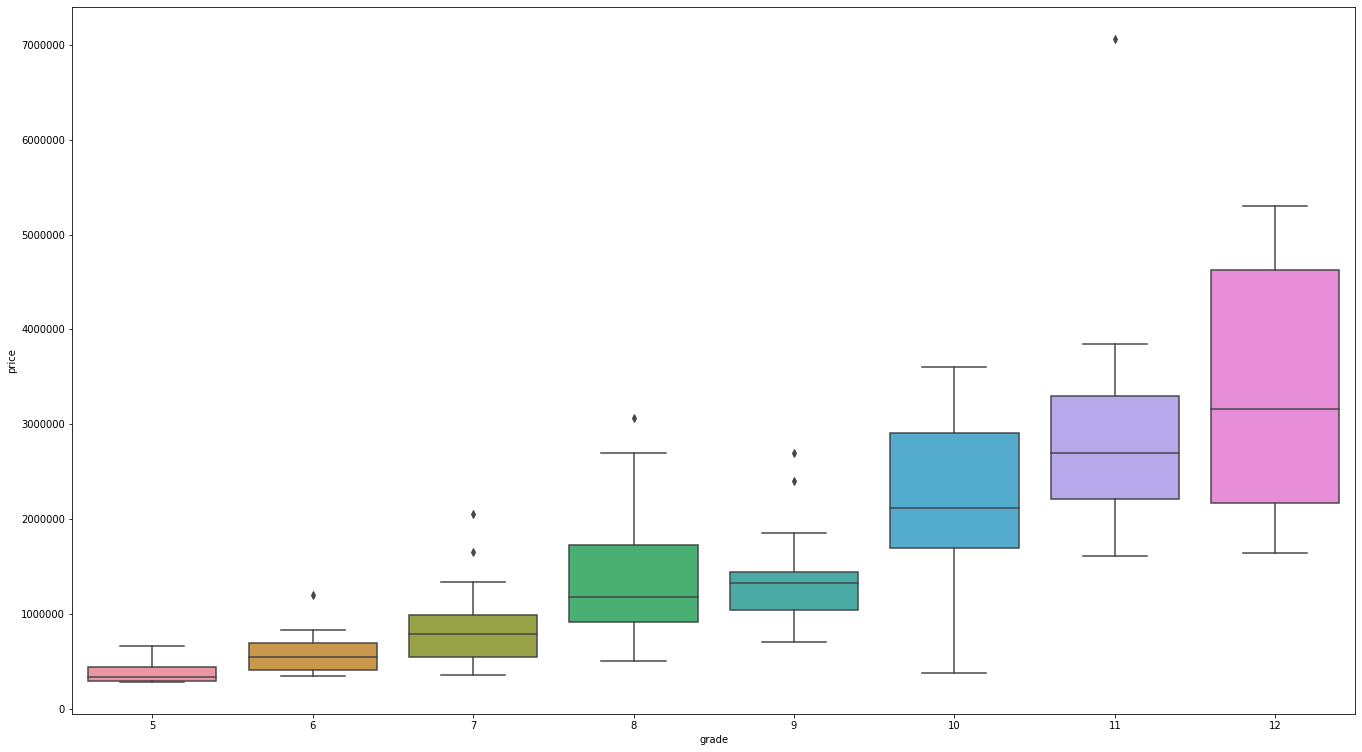

In [10]:
plt.figure(figsize=(23, 13))
fig1 = sns.boxplot(x="grade", y="price", data=waterfront)

<Figure size 1656x936 with 0 Axes>

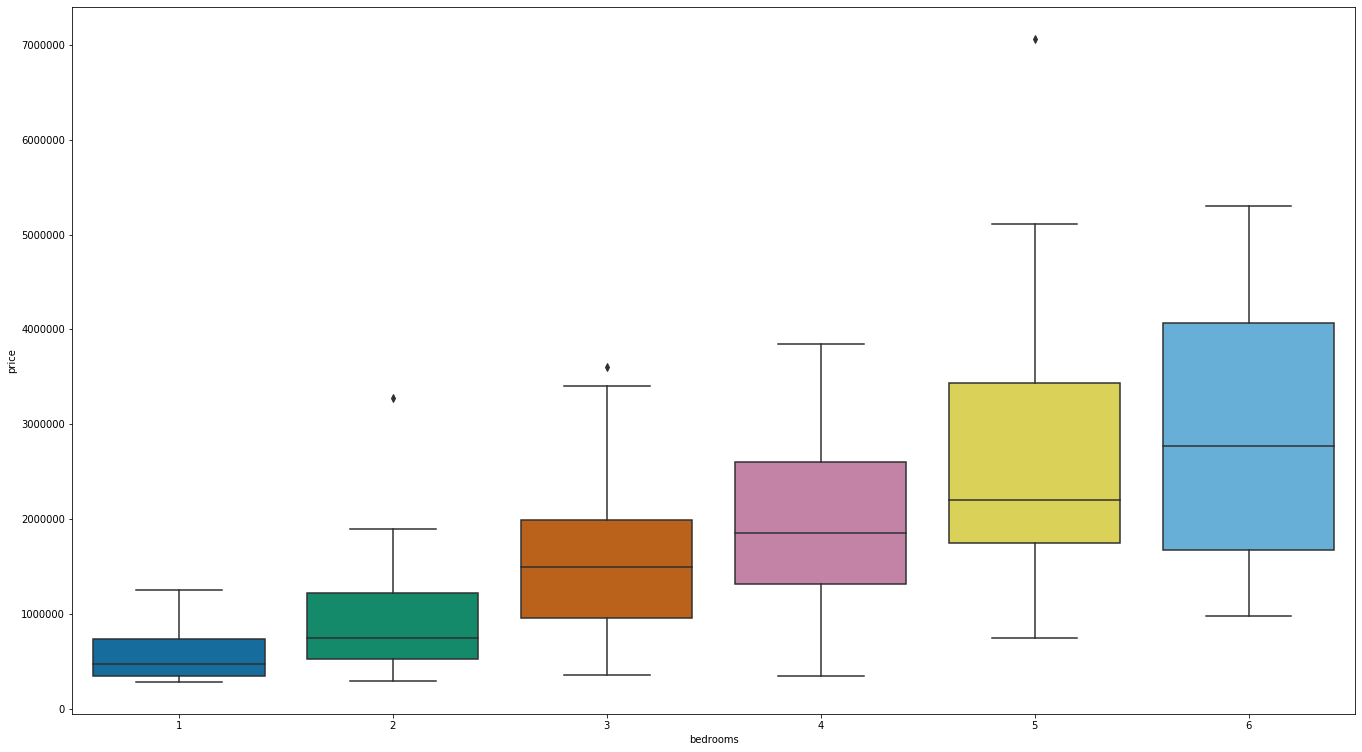

In [11]:
plt.figure(figsize=(23, 13))
fig2 = sns.boxplot(x="bedrooms", y="price", data=waterfront)

In [12]:
waterfront_features = waterfront.drop(columns=['date', 'id', 'condition', 'view', 'sqft_lot', 'sqft_lot15', 'yr_renovated', 'waterfront', 'floors', 'yr_built'])
waterfront_features.head(2)

,price,bedrooms,bathrooms,sqft_living,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15
49,1350000.0,3,2.50,2753,9,2165,588,98070,47.4041,-122.451,2680
229,655000.0,2,1.75,1450,7,1230,220,98166,47.4497,-122.375,2030


<Figure size 936x576 with 0 Axes>

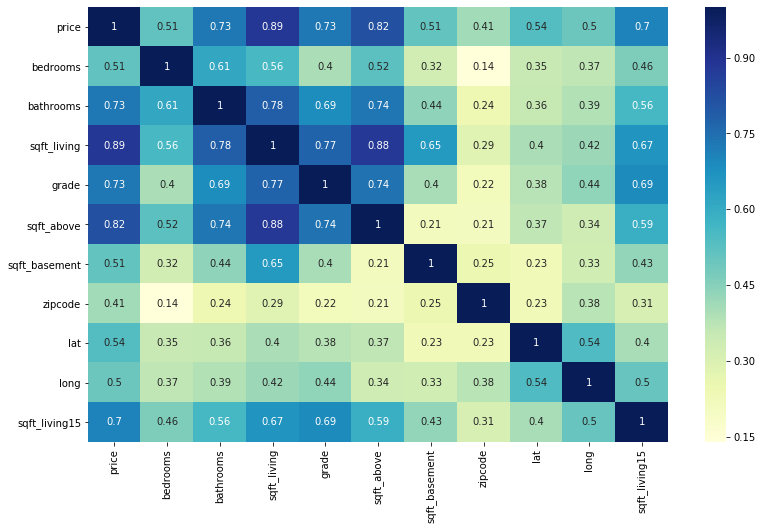

In [13]:
# heatmap to show relationships
plt.figure(figsize=(13,8))
fig3 = sns.heatmap(waterfront_features.corr().abs(), annot=True, cmap='YlGnBu')
plt.autoscale()
plt.show()

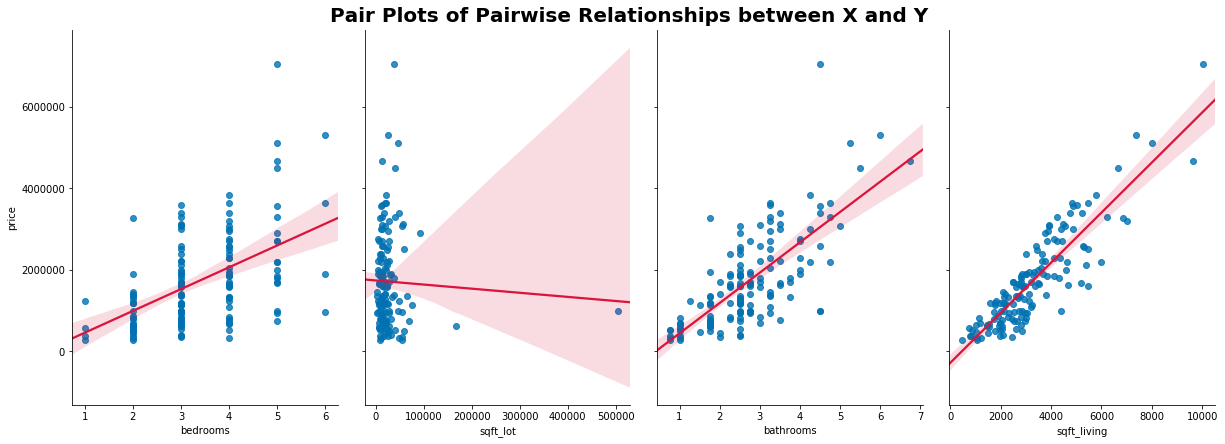

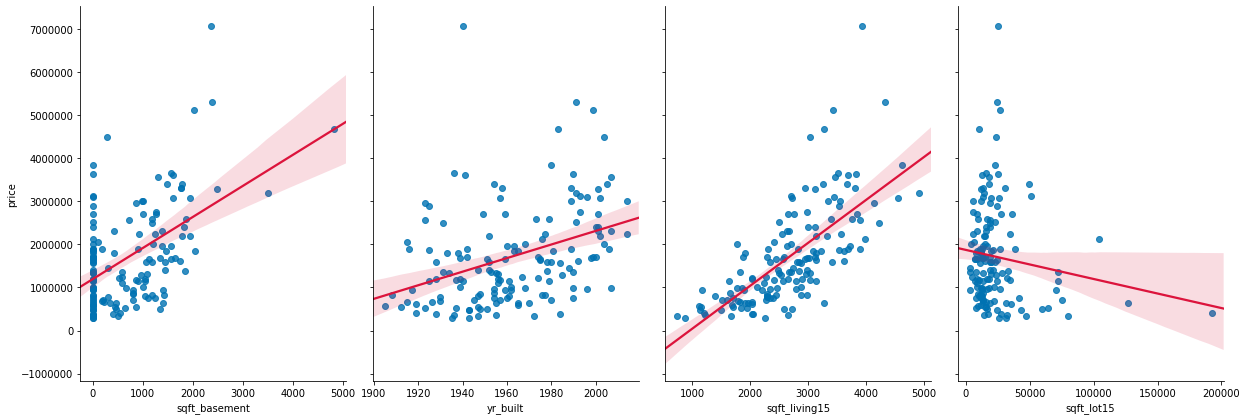

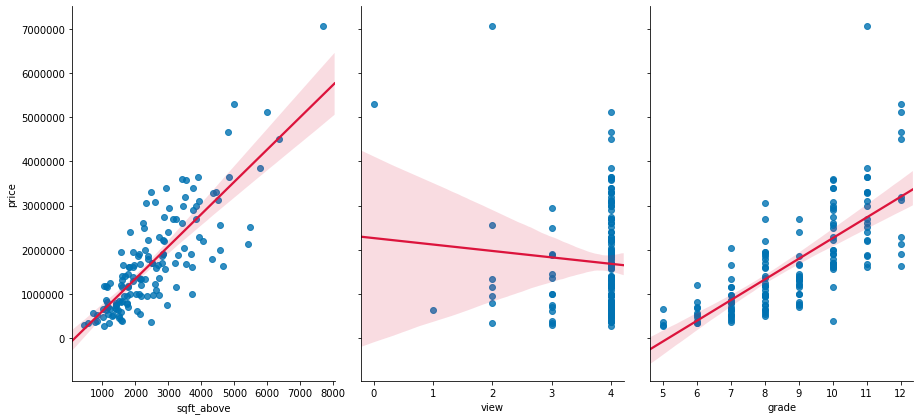

In [14]:
# visualize the pairwise relationship between the features and the response using pairplots 

sns.pairplot(x_vars=['bedrooms', 'sqft_lot', 'bathrooms', 'sqft_living'], y_vars='price', data=waterfront, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)

plt.suptitle('Pair Plots of Pairwise Relationships between X and Y', size=20, weight='bold', y=1.02)

sns.pairplot(x_vars=['sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15'], y_vars='price', data=waterfront, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
sns.pairplot(x_vars=['sqft_above', 'view', 'grade'], y_vars='price', data=waterfront, 
             kind='reg', plot_kws={'line_kws':{'color':'crimson'}}, height=6, aspect=0.7)
plt.show();

In [15]:
train = waterfront.drop(columns=['id', 'date', 'view', 'sqft_lot', 'lat', 'yr_built', 'sqft_basement', 'waterfront','sqft_lot15'])
train

,price,bedrooms,bathrooms,sqft_living,floors,condition,grade,sqft_above,yr_renovated,zipcode,long,sqft_living15
49,1350000.0,3,2.50,2753,1.0,5,9,2165,0,98070,-122.451,2680
229,655000.0,2,1.75,1450,2.0,3,7,1230,1978,98166,-122.375,2030
245,2400000.0,4,2.50,3650,1.0,3,9,1830,0,98074,-122.072,3120
263,369900.0,1,0.75,760,1.0,5,5,760,0,98070,-122.438,1230
299,3080000.0,4,5.00,4550,1.0,3,10,2600,0,98074,-122.077,4550
...,...,...,...,...,...,...,...,...,...,...,...,...
19797,1900000.0,3,2.50,2830,3.0,3,10,2830,0,98074,-122.071,2830
20136,3000000.0,3,3.50,4410,2.0,3,11,3430,0,98056,-122.205,3550
20576,2300000.0,4,4.00,4360,2.5,3,10,3940,0,98008,-122.104,2670
21009,2230000.0,3,3.50,3760,2.0,3,11,2830,0,98056,-122.205,3560


<Figure size 936x576 with 0 Axes>

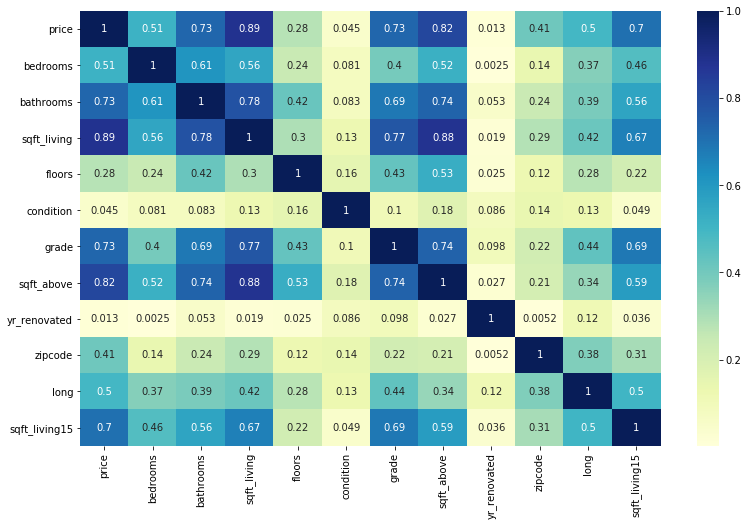

In [16]:
# heatmap to show relationships
plt.figure(figsize=(13,8))
fig3 = sns.heatmap(train.corr().abs(), annot=True, cmap='YlGnBu')
plt.autoscale()
plt.show()

In [17]:
train.drop(['yr_renovated','floors','condition','zipcode', 'long', 'bedrooms'],axis=1,inplace=True)

<Figure size 936x576 with 0 Axes>

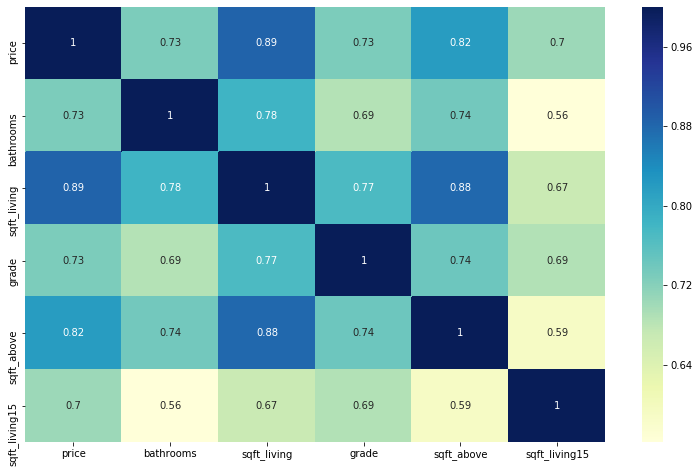

In [18]:
# heatmap to show relationships
plt.figure(figsize=(13,8))
fig3 = sns.heatmap(train.corr().abs(), annot=True, cmap='YlGnBu')
plt.autoscale()
plt.show()

In [19]:
train = train.drop(columns=['sqft_living15'])

In [20]:
grade = pd.get_dummies(train.grade)
bathroom = pd.get_dummies(train.bathrooms)

In [21]:
merged = pd.concat([train, grade, bathroom], axis=1)
merged.head()
merged.grade.describe()

,price,bathrooms,sqft_living,grade,sqft_above,5,6,7,8,9,...,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.5,6.0,6.75
49,1350000.0,2.50,2753,9,2165,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
229,655000.0,1.75,1450,7,1230,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
245,2400000.0,2.50,3650,9,1830,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
263,369900.0,0.75,760,5,760,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,3080000.0,5.00,4550,10,2600,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


count    146.000000
mean       8.835616
std        1.781233
min        5.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       12.000000
Name: grade, dtype: float64

In [22]:
final = merged.drop(columns=['grade', 'bathrooms'], axis='columns')

In [23]:
model = LinearRegression()

In [24]:
X = final.drop('price',axis='columns')
X

,sqft_living,sqft_above,5,6,7,8,9,10,11,12,...,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.5,6.0,6.75
49,2753,2165,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,1450,1230,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
245,3650,1830,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,760,760,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
299,4550,2600,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,2830,2830,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
20136,4410,3430,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20576,4360,3940,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
21009,3760,2830,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
y=final.price

In [26]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
model.score(X,y)

0.8448298193048659

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
dfle = train
dfle.grade = le.fit_transform(dfle.grade)

In [30]:
dfle.bathrooms = le.fit_transform(dfle.bathrooms)
dfle

,price,bathrooms,sqft_living,grade,sqft_above
49,1350000.0,7,2753,4,2165
229,655000.0,4,1450,2,1230
245,2400000.0,7,3650,4,1830
263,369900.0,0,760,0,760
299,3080000.0,17,4550,5,2600
...,...,...,...,...,...
19797,1900000.0,7,2830,5,2830
20136,3000000.0,11,4410,6,3430
20576,2300000.0,13,4360,5,3940
21009,2230000.0,11,3760,6,2830


In [31]:
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above']].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [32]:
y = dfle.price

In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[1,3])

In [34]:
ohe.fit_transform(X).toarray()

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.  , 0.  , 0.  , ..., 0.  , 1.  , 7.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 2.25, 7.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 6.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.75, 7.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 2.5 , 8.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.75, 7.  ]])

In [182]:
X = X[:,1:]
len(X[0])

1

In [172]:
X = X[:,:-1]
X

array([[1180.,    7.],
       [2570.,    7.],
       [ 770.,    6.],
       ...,
       [1020.,    7.],
       [1600.,    8.],
       [1020.,    7.]])

<b>My model should predict 84% of the values in my model.

In [61]:
# Create the OLS model with all features to compare
formula_str = 'price ~ sqft_living'
res = ols(formula=formula_str, data=waterfront).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     522.2
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           9.43e-50
Time:                        23:08:28   Log-Likelihood:                -2131.7
No. Observations:                 146   AIC:                             4267.
Df Residuals:                     144   BIC:                             4273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.744e+05   9.77e+04     -2.808      0.006   -4.68e+05   -8.12e+04
sqft_living   613.7987     26.859     22.853      0.000     560.710     666.888
==============================================================================
Omnibus:                        2.185   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.335   Jarque-Bera (JB):                2.216
Skew:                          -0.287   Prob(JB):                        0.330
Kurtosis:                       2.814   Cond. No.                     8.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('price',axis=1), 
                                                    train['price'], test_size=0.30, 
                                                    random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
train

,price,bathrooms,sqft_living,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,3.0,2,3,4,5,2,3,4,5,6
49,1350000.0,2.50,2753,1,2165,588,1953,0,98070,47.4041,...,0,0,0,0,1,0,1,0,0,0
229,655000.0,1.75,1450,1,1230,220,1915,1978,98166,47.4497,...,0,0,1,0,0,1,0,0,0,0
245,2400000.0,2.50,3650,1,1830,1820,2000,0,98074,47.6338,...,0,0,1,0,0,0,0,1,0,0
263,369900.0,0.75,760,1,760,0,1936,0,98070,47.4683,...,0,0,0,0,1,0,0,0,0,0
299,3080000.0,5.00,4550,1,2600,1950,2002,0,98074,47.6053,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,1900000.0,2.50,2830,1,2830,0,2006,0,98074,47.6318,...,1,0,1,0,0,0,1,0,0,0
20136,3000000.0,3.50,4410,1,3430,980,2014,0,98056,47.5283,...,0,0,1,0,0,0,1,0,0,0
20576,2300000.0,4.00,4360,1,3940,420,2007,0,98008,47.5724,...,0,0,1,0,0,0,0,1,0,0
21009,2230000.0,3.50,3760,1,2830,930,2014,0,98056,47.5285,...,0,0,1,0,0,0,1,0,0,0


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    285000.0       0.00      0.00      0.00       1.0
    340000.0       0.00      0.00      0.00       1.0
    380000.0       0.00      0.00      0.00       0.0
    500000.0       0.00      0.00      0.00       1.0
    503000.0       0.00      0.00      0.00       0.0
    540000.0       0.00      0.00      0.00       1.0
    549000.0       0.00      0.00      0.00       1.0
    570000.0       0.00      0.00      0.00       1.0
    600000.0       0.00      0.00      0.00       1.0
    615000.0       0.00      0.00      0.00       0.0
    629000.0       0.00      0.00      0.00       1.0
    635000.0       0.00      0.00      0.00       1.0
    650000.0       0.00      0.00      0.00       1.0
    655000.0       0.00      0.00      0.00       1.0
    705000.0       0.00      0.00      0.00       0.0
    750000.0       0.00      0.00      0.00       0.0
    800000.0       0.00      0.00      0.00       0.0
    820000.0       0.00    

/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/shirlwilliams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [65]:

# Create the OLS model with all features to compare
formula_str = 'price ~ sqft_living + sqft_above + sqft_living15'
res = ols(formula=formula_str, data=waterfront).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 18 Feb 2020   Prob (F-statistic):           9.11e-52
Time:                        23:10:50   Log-Likelihood:                -2120.5
No. Observations:                 146   AIC:                             4249.
Df Residuals:                     142   BIC:                             4261.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.919e+05   1.45e+05     -5.451      0.000   -1.08e+06   -5.05e+05
sqft_living     409.1541     57.091      7.167      0.000     296.296     522.012
sqft_above      160.9538     67.788      2.374      0.019      26.949     294.958
sqft_living15   289.8775     68.712      4.219      0.000     154.046     425.709
==============================================================================
Omnibus:                        6.332   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.000
Skew:                          -0.414   Prob(JB):                       0.0498
Kurtosis:                       3.549   Cond. No.                     1.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 